In [117]:
import keras
import skimage
import matplotlib.pyplot as plt
import numpy as np

In [118]:
model = keras.saving.load_model("colorization.keras")

array([[41.56862745, 33.7254902 , 33.7254902 , ..., 36.8627451 ,
        41.17647059, 35.29411765],
       [40.        , 32.54901961, 32.54901961, ..., 33.33333333,
        41.17647059, 37.25490196],
       [38.43137255, 30.19607843, 30.19607843, ..., 39.21568627,
        47.05882353, 43.52941176],
       ...,
       [ 9.41176471,  9.41176471,  9.41176471, ...,  5.49019608,
         4.70588235,  5.49019608],
       [ 9.41176471,  9.41176471,  9.41176471, ...,  8.23529412,
        10.98039216,  8.23529412],
       [ 9.41176471,  9.41176471,  9.41176471, ...,  9.01960784,
        10.98039216,  9.01960784]])

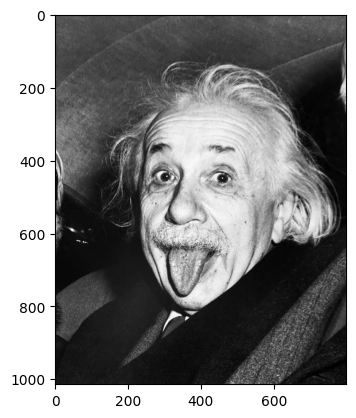

In [124]:
img = (skimage.io.imread("einstein langue.png", as_gray=True))
img = (img/(np.max(img) - np.min(img)))*100
plt.imshow(img, cmap="gray")
img

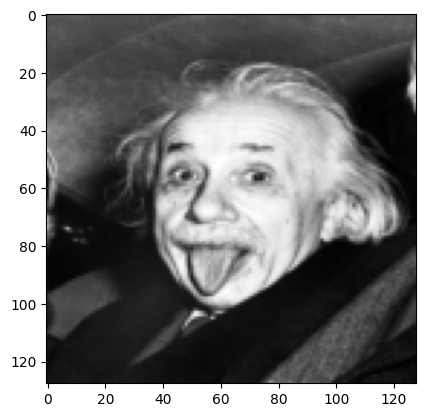

In [120]:
img_resized = skimage.transform.resize(img, (128, 128))
plt.imshow(img_resized, cmap="gray")

In [121]:
ab_predict = model.predict(np.array([img_resized]), batch_size=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


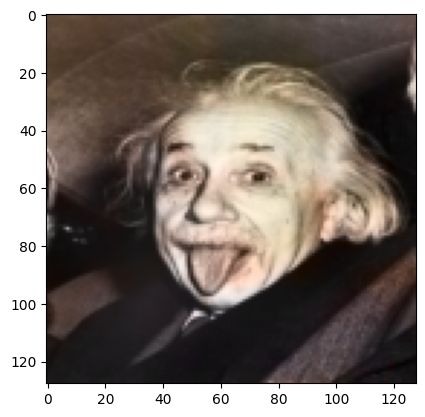

In [122]:
def rassembler_L_et_ab(L, ab):
    a = ab[:,:,0]
    b = ab[:,:,1]
    return skimage.color.lab2rgb(np.stack([L, a, b], axis=2))

plt.imshow(rassembler_L_et_ab(img_resized, ab_predict[0]))